In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import Model
from keras.layers import Dense,Input,Dropout
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=10,6
RANDOM_SEED=42

In [2]:
data=pd.read_csv('survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.shape

(309, 16)

In [4]:
df=data
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])

In [6]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


<Axes: xlabel='LUNG_CANCER', ylabel='count'>

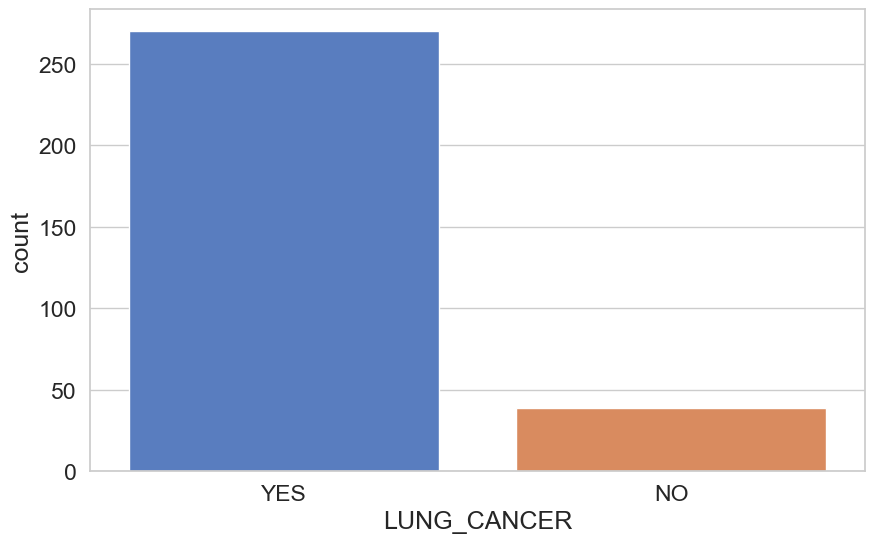

In [7]:
sns.countplot(x ='LUNG_CANCER', data = df)

In [8]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
xtrain,xtest=train_test_split(data,test_size=0.2,random_state=RANDOM_SEED)
xtrain=xtrain[xtrain["LUNG_CANCER"]=='YES']
xtrain=xtrain.drop(['LUNG_CANCER'],axis=1)
print(xtrain.shape)
print()
print(xtrain.head(2))


(210, 15)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
126       1   51        2               1        1              1   
109       1   53        1               1        1              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
126                1         2         1         2                  2   
109                2         2         2         1                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
126         2                    2                      1           2  
109         1                    2                      1           2  


In [10]:
ytest=xtest['LUNG_CANCER']
xtest.head()
xtest=xtest.drop(['LUNG_CANCER'],axis=1)
xtrain=xtrain.values
xtest=xtest.values

In [11]:
print(xtrain.shape)
print()
print(xtest.shape)


(210, 15)

(62, 15)


In [13]:
print(ytest.shape)


(62,)


In [15]:
input_dim=xtrain.shape[1]
encoding_dim=14


In [16]:
input_layer=Input(shape=(input_dim,))
encoder=Dense(encoding_dim,activation='tanh',
 activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder=Dense(int(encoding_dim/2),activation='relu')(encoder)
decoder=Dense(int(encoding_dim/2),activation='tanh')(encoder)
decoder=Dense(input_dim,activation='relu')(decoder)
autoencoder=Model(inputs=input_layer,outputs=decoder)

In [17]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 14)                224       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 15)                120       
                                                                 
Total params: 505 (1.97 KB)
Trainable params: 505 (1.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
nb_epoch=30
batch_size=32

autoencoder.compile(optimizer='adam',
                     loss='mean_squared_error',
                    metrics=['accuracy'])

checkpointer=ModelCheckpoint(filepath='model_ae.h5',
                             verbose=0,
                            save_best_only=True)

tensorboard=TensorBoard(log_dir='./logs',
                         histogram_freq=0,
                        write_graph=True,
                        write_images=True)

history=autoencoder.fit(xtrain,xtrain,
                         epochs=nb_epoch,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(xtest,xtest),
                         verbose=1,
                        callbacks=[checkpointer,tensorboard]).history

Epoch 1/30
7/7 [==============================] - 2s 89ms/step - loss: 262.7714 - accuracy: 0.0000e+00 - val_loss: 278.5727 - val_accuracy: 0.0000e+00
Epoch 2/30
1/7 [===>..........................] - ETA: 0s - loss: 259.7108 - accuracy: 0.0000e+00

C:\Users\jagad\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 0s 22ms/step - loss: 261.9695 - accuracy: 0.0000e+00 - val_loss: 277.8091 - val_accuracy: 0.0000e+00
Epoch 3/30
7/7 [==============================] - 0s 20ms/step - loss: 261.2485 - accuracy: 0.0000e+00 - val_loss: 277.0945 - val_accuracy: 0.0000e+00
Epoch 4/30
7/7 [==============================] - 0s 22ms/step - loss: 260.5637 - accuracy: 0.0000e+00 - val_loss: 276.4081 - val_accuracy: 0.0000e+00
Epoch 5/30
7/7 [==============================] - 0s 21ms/step - loss: 259.9216 - accuracy: 0.0000e+00 - val_loss: 275.7823 - val_accuracy: 0.0000e+00
Epoch 6/30
7/7 [==============================] - 0s 20ms/step - loss: 259.3103 - accuracy: 0.0000e+00 - val_loss: 275.1565 - val_accuracy: 0.0000e+00
Epoch 7/30
7/7 [==============================] - 0s 25ms/step - loss: 258.7015 - accuracy: 0.0000e+00 - val_loss: 274.5274 - val_accuracy: 0.0000e+00
Epoch 8/30
7/7 [==============================] - 0s 23ms/step - loss: 258.0872 - accuracy: 0.0000e+00 - 

In [19]:
from keras.models import load_model
autoencoder=load_model('model_ae.h5')

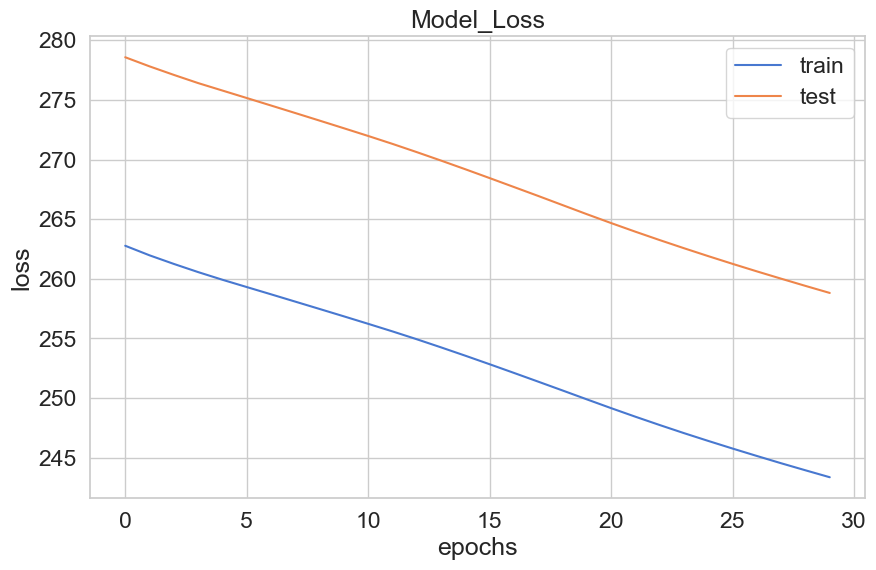

In [20]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model_Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')

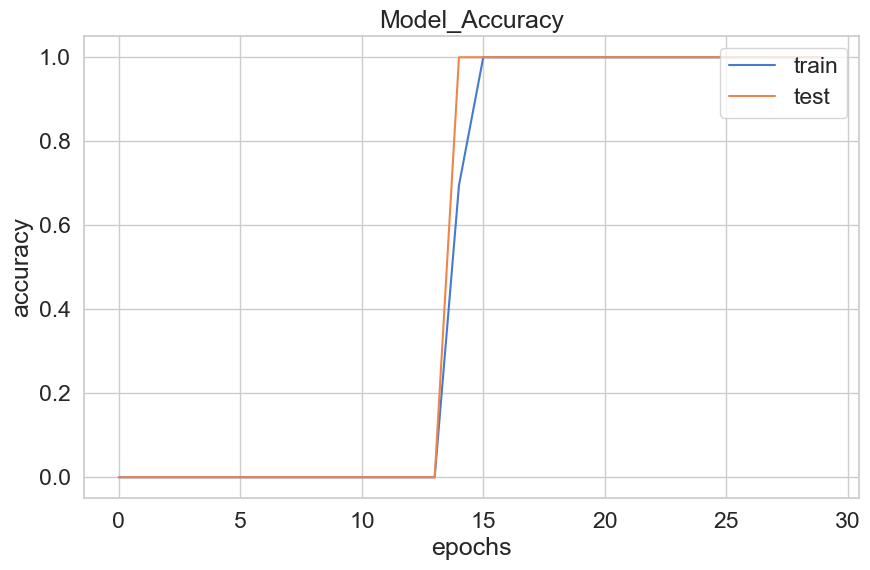

In [21]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')


In [22]:
predictions=autoencoder.predict(xtest)

2/2 [==============================] - 0s 6ms/step


In [23]:
mse=np.mean(np.power(xtest-predictions,2),axis=1)
error_df=pd.DataFrame({'Reconstruction_error':mse,'true_class':ytest})

In [24]:
error_df


,Reconstruction_error,true_class
288,226.959936,YES
9,169.334256,YES
57,329.914789,YES
60,302.471931,YES
25,259.274981,YES
...,...,...
198,329.734848,YES
195,293.528606,YES
210,175.421568,YES
224,234.606030,YES


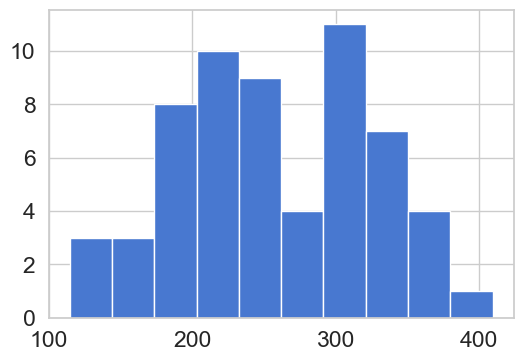

In [26]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
normal_error_df=error_df[(error_df['true_class']=='YES') & (error_df['Reconstruction_error'])]
_=ax.hist(normal_error_df.Reconstruction_error.values,bins=10)


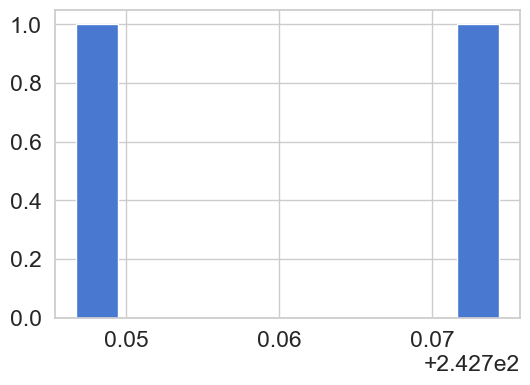

In [27]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
fraud_error_df=error_df[(error_df['true_class']=='NO')]
_=ax.hist(fraud_error_df.Reconstruction_error.values,bins=10)